# 🗣 <span style="color:#f78d86;">**Hate Speech Analysis and Prediction**</span>


___Project Domain :  Social Media Analysis and Cybersecurity___

----------------------------------------------------------------------------------------------------------------

#### ___Problem Statement and Goal of the Project :___

- _The increasing use of social media has brought about a concerning rise in hate speech, which can make discrimination and toxic communities. The problem we face is how to effectively identify and address hate speech on social media platforms._

- _The goal is to create a model that can distinguish between harmful speech and acceptable speech, ensuring a safer online environment for users. This involves leveraging technologies like ***Natural Language Processing (NLP) and Machine Learning*** to analyze text and identify harmful language patterns._

- In addition to this the project aims to enhance our understanding of ***hate speech dynamics, identify patterns and trends over time, profile users prone to engaging inhate speech, analyze geographic distributions*** and ultimately develop effective strategies to detect and mitigate hate speech online.

__________________________________________________________________________________________________________________

#### ___Project Benefits :___
- **Content Removal :**  Platforms can automatically flag or remove content identified as hate speech based on the detection algorithms. This can help in preventing the spread of harmful content and maintaining community guidelines.

- **User Warning and Education :** Users who engage in or are exposed to hate speech can be provided with warnings about the nature of the content and educational resources about the impact and consequences of hate speech.
 
-  **User Suspension or Ban :** Depending on the severity and frequency of hate speech occurrences, users responsible for generating or promoting hate speech may face temporary suspension or permanent ban from the platform.
- **Reporting Mechanisms :** Platforms can encourage users to report instances of hate speech, enabling the moderation team to review flagged content promptly and take appropriate actions.


__________________________________________________________________________________________________________________

![](https://i0.wp.com/cjp.org.in/wp-content/uploads/2018/01/Hate-Speech-FE-Legal-Resource.png?fit=1020%2C534&ssl=1)

_Image Credits : [cjp.org.in](https://cjp.org.in/understand-what-constitutes-hate-speech/)_

#### ___Load datasets :___

- _The datasets are available in ".txt" format._
- _The datasets are laoded into pandas Dataframe for convinience._

In [1]:
#Import necessary libraries
import os
import pandas as pd

In [2]:
directory = r"C:\Users\banup\Desktop\Carrer Fair projects\ML projects\Hate Speech\Hate Speech Dataset\Text file"
#----------------------------------------------------------------------------------------------------------------
#List for storing the data
data = []
#---------------------------------------------------------------------------------------------------------------
for filename in os.listdir(directory): 
    with open(os.path.join(directory, filename), 'r', encoding='utf-8') as file:
        content = file.read()
        data.append((filename[:-4], content))

In [3]:
#Creating a dataframe
df_1 = pd.DataFrame(data, columns=['file_id', 'context'])
#------------------------------------------------
print("Shape of data :",df_1.shape)
df_1.head(5)

Shape of data : (10944, 2)


,file_id,context
0,12834217_1,"As of March 13th , 2014 , the booklet had been..."
1,12834217_10,Thank you in advance. : ) Download the youtube...
2,12834217_2,In order to help increase the booklets downloa...
3,12834217_3,( Simply copy and paste the following text int...
4,12834217_4,Click below for a FREE download of a colorfull...


_Loading the related file which contains "label" (hate or nohate) of the previously loaded  text data (content) and other related details._

In [4]:
#Dataframe
df_2 = pd.read_csv("Annotations_Metadata.csv")
#------------------------------------------------
print("Shape of data :",df_2.shape)
df_2.head(5)

Shape of data : (10944, 5)


,file_id,user_id,subforum_id,num_contexts,label
0,12834217_1,572066,1346,0,noHate
1,12834217_2,572066,1346,0,noHate
2,12834217_3,572066,1346,0,noHate
3,12834217_4,572066,1346,0,hate
4,12834217_5,572066,1346,0,noHate


_Merging dataframes together :_

In [5]:
#Merging with respect to "file_id"
df = pd.merge(df_1, df_2, how="left", on="file_id")
print("Shape of data :",df.shape)
df.head()

Shape of data : (10944, 6)


,file_id,context,user_id,subforum_id,num_contexts,label
0,12834217_1,"As of March 13th , 2014 , the booklet had been...",572066,1346,0,noHate
1,12834217_10,Thank you in advance. : ) Download the youtube...,572066,1346,0,noHate
2,12834217_2,In order to help increase the booklets downloa...,572066,1346,0,noHate
3,12834217_3,( Simply copy and paste the following text int...,572066,1346,0,noHate
4,12834217_4,Click below for a FREE download of a colorfull...,572066,1346,0,hate


In [6]:
#Checking for duplicates
print("Duplicated rows :",df.duplicated().sum())

Duplicated rows : 0


In [7]:
#Checking for null values
print("Null values : \n",df.isnull().sum())

Null values : 
 file_id         0
context         0
user_id         0
subforum_id     0
num_contexts    0
label           0
dtype: int64


___Column Description :___

- file_id: Unique identifier for each file containing textual context.
- context : textual context posted by the user.
- user_id: Identifier for the user posting the context.
- subforum_id: Identifier for the subforum where the context was posted.
- num_contexts: Number of contexts associated with each file.
- label: Label indicating whether the context contains hate speech or not.

## **Exploratory Data Analysis (EDA) :**

In [8]:
#Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

___Basic Data Information :___

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10944 entries, 0 to 10943
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   file_id       10944 non-null  object
 1   context       10944 non-null  object
 2   user_id       10944 non-null  int64 
 3   subforum_id   10944 non-null  int64 
 4   num_contexts  10944 non-null  int64 
 5   label         10944 non-null  object
dtypes: int64(3), object(3)
memory usage: 513.1+ KB


In [10]:
#Checking for unique values
print("Number of unique users, who posted the context :",df["user_id"].nunique())
print("Number of unique subforum id :",df["subforum_id"].nunique())

Number of unique users, who posted the context : 2792
Number of unique subforum id : 21


In [11]:
#Checking for unique labels
print("Number of unique labels :",df["label"].nunique())
print("Value counts of unique labels :",df["label"].value_counts())

Number of unique labels : 4
Value counts of unique labels : label
noHate      9507
hate        1196
relation     168
idk/skip      73
Name: count, dtype: int64


- ___Label columns have unwanted labeled data such as "relation" and "idk/skip " ,which means it is not needed for the further process.So they are neglected.___

In [12]:
#Removing the unwanted labeled data
df=df[~(df["label"].isin(["relation","idk/skip"]))]
#------------------------------------------------------------------
print("Value counts of unique labels :",df["label"].value_counts())
#------------------------------------------------------------------
print("Shape of data after unwanted label removal :",df.shape)
#------------------------------------------------------------------------------
print("Number of unique users, who posted the context after unwanted label removal  :",df["user_id"].nunique())
print("Number of unique subforum id after unwanted label removal :",df["subforum_id"].nunique())

Value counts of unique labels : label
noHate    9507
hate      1196
Name: count, dtype: int64
Shape of data after unwanted label removal : (10703, 6)
Number of unique users, who posted the context after unwanted label removal  : 2778
Number of unique subforum id after unwanted label removal : 21


### ___Data Distribution :___

##### ___Label distribution :___

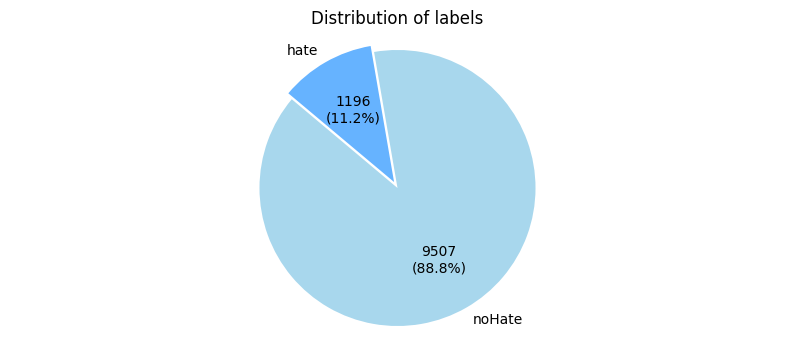

In [13]:
# Plot the distribution of label
plt.figure(figsize=(10, 4))
label_counts = df["label"].value_counts()
labels = label_counts.index.tolist()
counts = label_counts.values.tolist()
explode = (0.05, 0) 
colors = ['#a8d7ed','#66b3ff']
plt.pie(counts, labels=labels, autopct=lambda p: '{:.0f}\n({:.1f}%)'.format(p * sum(counts) / 100, p), startangle=140, explode=explode,colors=colors)
plt.title('Distribution of labels')
plt.axis('equal') 
plt.show()

___Observation :___
- _The dataset has imbalanced  labeled data distribution._
- _"noHate" labeled  data is around **88.8%** and "hate" labeled data is around **11.2%**._

##### ___Subforum ID distribution :___

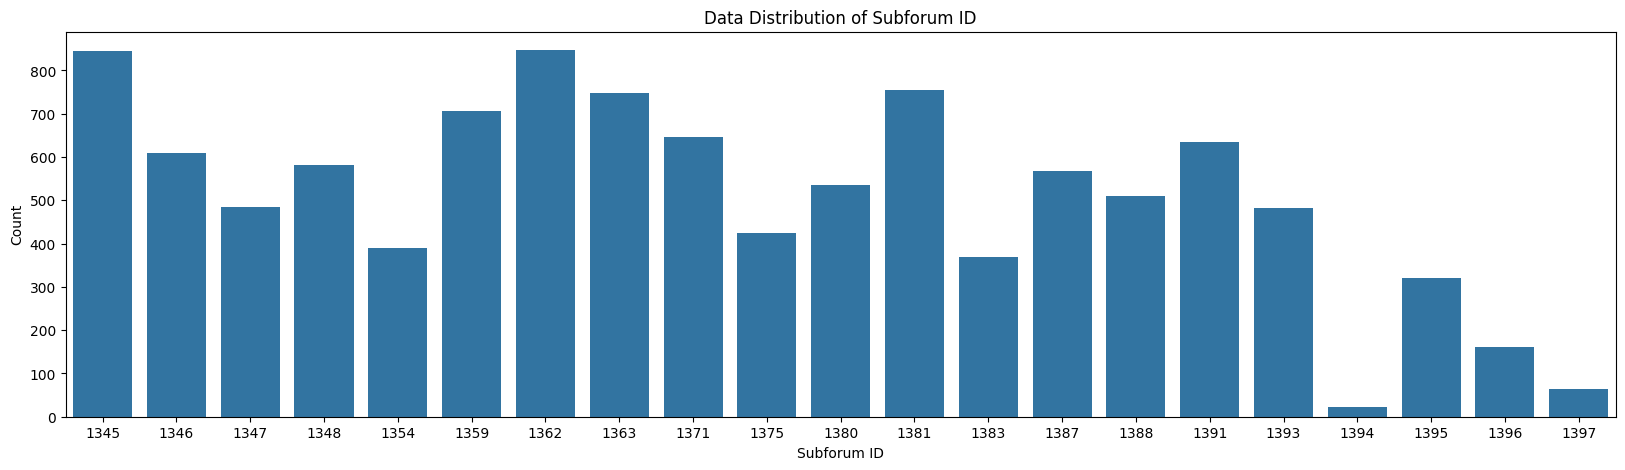

In [14]:
# Plot the data distribution of subforum ID
plt.figure(figsize=(20, 5))
sns.countplot(x=df["subforum_id"])
plt.title('Data Distribution of Subforum ID')
plt.xlabel('Subforum ID')
plt.ylabel('Count')
plt.show()

___Observation :___
- _There are **'21'** different subforum context participated in this data._

- _Each of the subforum IDs '1362' and '1345' contributes approximately **7.9%** of the total content. Least contribution of around **0.2%** is from subforum ID '1394'._


##### ___Distribution of Labels in Different Subforums IDs:___

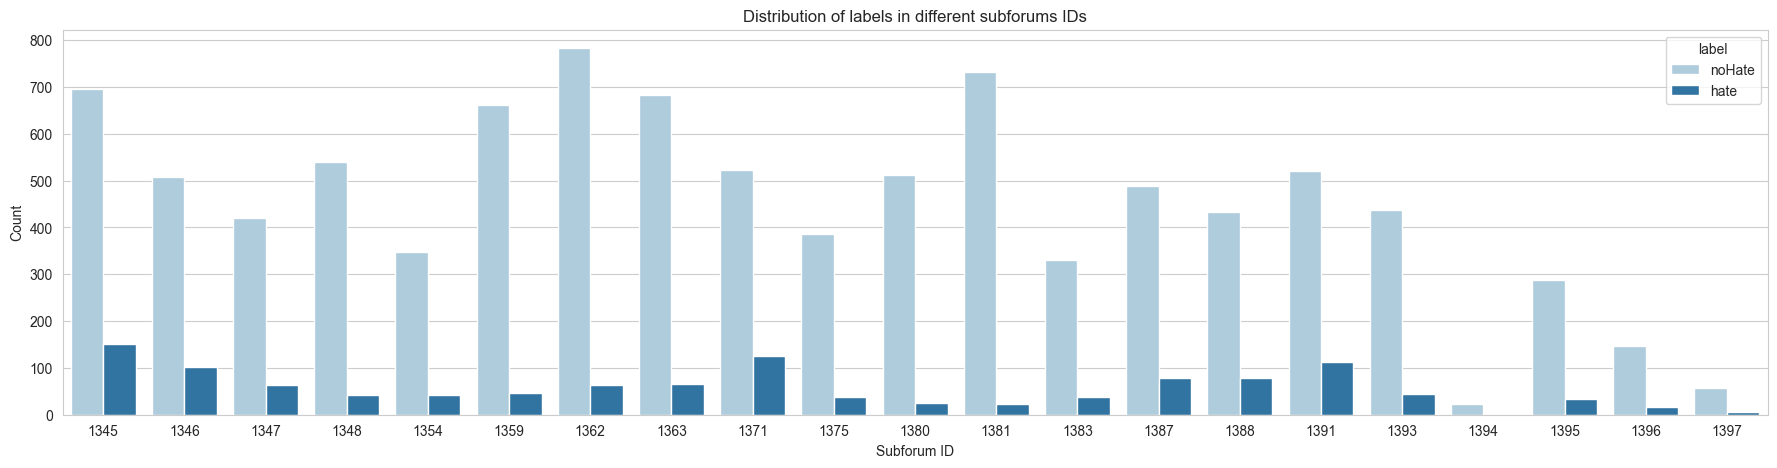

In [15]:
# Plot the labels distribution in different subforums 
plt.figure(figsize=(22, 5))
sns.set_style("whitegrid")
sns.countplot(x=df["subforum_id"],hue=df["label"],palette="Paired")
plt.title('Distribution of labels in different subforums IDs')
plt.xlabel('Subforum ID')
plt.ylabel('Count')
plt.show()

In [16]:
subforum_id_list=[]
hate_count_list=[]
nohate_count_list=[]
#------------------------------------------------------------------------------------------------------------------
for id in df["subforum_id"].unique().tolist():
               subforum_id_list.append(id)
               hate_count_list.append(df[(df["subforum_id"]==id)&(df["label"]=="hate")].shape[0])
               nohate_count_list.append(df[(df["subforum_id"]==id)&(df["label"]=="noHate")].shape[0])
#------------------------------------------------------------------------------------------------------------------
df_subforum_id_label=pd.DataFrame({"subforum_id":subforum_id_list,"hate_count":hate_count_list,"nohate_count":nohate_count_list})
#------------------------------------------------------------------------------------------------------------------
df_subforum_id_label['total_context_count'] = df_subforum_id_label['hate_count'] + df_subforum_id_label['nohate_count']
df_subforum_id_label['hate_percentage'] = (df_subforum_id_label['hate_count'] / df_subforum_id_label['total_context_count']) * 100
df_subforum_id_label['nohate_percentage'] = (df_subforum_id_label['nohate_count'] / df_subforum_id_label['total_context_count']) * 100
#------------------------------------------------------------------------------------------------------------------
pd.set_option("display.max_columns",None)
df_subforum_id_label

,subforum_id,hate_count,nohate_count,total_context_count,hate_percentage,nohate_percentage
0,1346,102,507,609,16.748768,83.251232
1,1396,16,146,162,9.876543,90.123457
2,1397,6,57,63,9.523810,90.476190
3,1347,64,420,484,13.223140,86.776860
4,1345,150,695,845,17.751479,82.248521
5,1395,34,287,321,10.591900,89.408100
6,1394,0,22,22,0.000000,100.000000
7,1393,45,437,482,9.336100,90.663900
8,1391,113,521,634,17.823344,82.176656
9,1387,78,489,567,13.756614,86.243386


___Observation :___

- _Within the total hate speech context, approximately **12.5%** originates from subforum ID 1345._

- _Hate speech context is very less (3.0%) in subforum ID 1381 comparing with its no hate speech._

- _There is no hate speech context in subforum ID 1394.It is noted that very few number of context is posted in this subforum._

- _More positive context are posted in subforum ID 1362 among all subforums. **92.4%**  "nohate" context are posted among total context in this subforum._

- _**Hate and no hate ratio is higher** in subforum ID **1371** by comparing with all._

- _Subforum IDs **1345,1371,1391,1346,1388** are top IDs with more hate speech._


##### ___Distribution of Labels in Different User IDs:___

_Number of Unique User IDs :_

In [17]:
print("Number of Unique User IDs :",df["user_id"].nunique())

Number of Unique User IDs : 2778


In [18]:
# Group by user_id and label, and count occurrences
user_label_counts = df.groupby(['user_id', 'label']).size().unstack(fill_value=0)
#-----------------------------------------------------------------------------------
user_label_counts = user_label_counts.reset_index()
#-----------------------------------------------------------------------------------
user_label_counts.columns = ['user_id', 'nohate_count', 'hate_count']
#-----------------------------------------------------------------------------------
#Converting user id into object
user_label_counts['user_id'] = user_label_counts['user_id'].astype(str)
#-----------------------------------------------------------------------------------
pd.set_option("display.max_rows",None)
user_label_counts.head()

,user_id,nohate_count,hate_count
0,572033,1,3
1,572036,0,1
2,572037,3,0
3,572041,0,2
4,572042,0,13


___Top 50 User IDs with Maximum Hate Speech :___

In [19]:
user_hate_counts_sorted = user_label_counts.sort_values(by='hate_count', ascending=False)
user_hate_counts_sorted  = user_hate_counts_sorted .reset_index(drop=True)
user_hate_counts_sorted .head()

,user_id,nohate_count,hate_count
0,572043,21,216
1,572095,0,78
2,575695,4,60
3,572066,3,60
4,572266,9,59


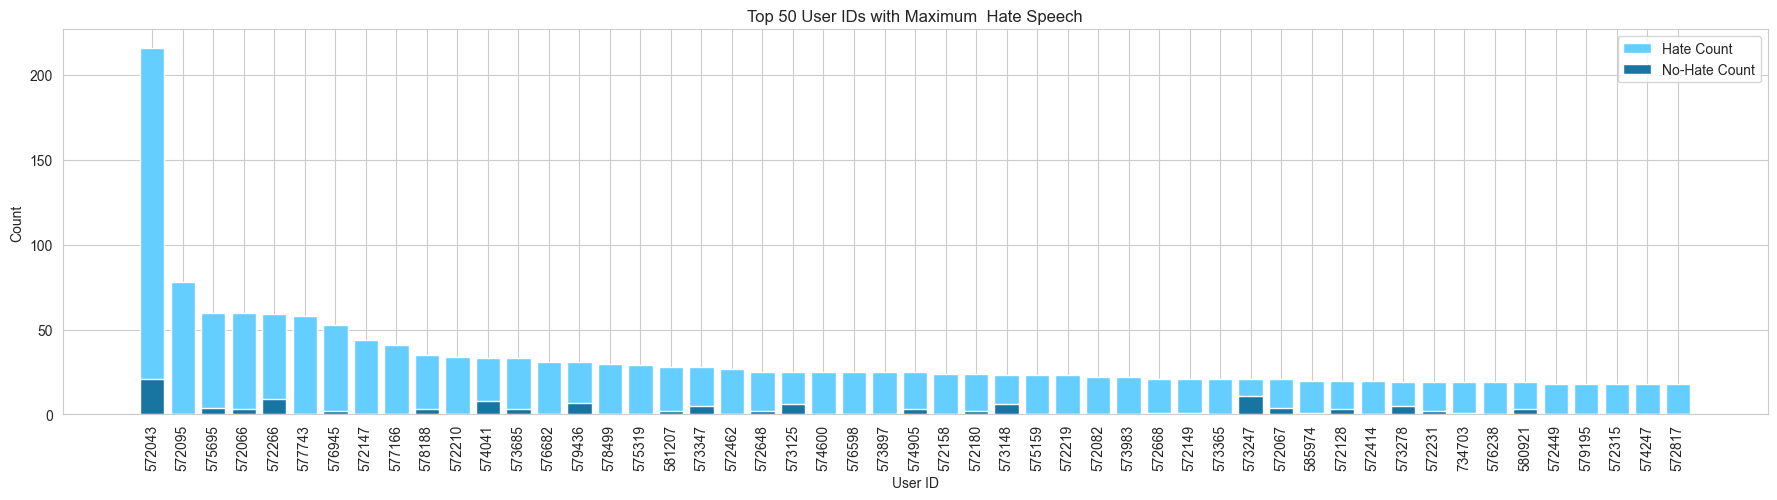

In [20]:
# Plotting graph for user id vs count of hate speech
plt.figure(figsize=(22, 5))
hate_bars=plt.bar(user_hate_counts_sorted['user_id'].loc[0:50], user_hate_counts_sorted['hate_count'].loc[0:50], color='#63ceff')
nohate_bars=plt.bar(user_hate_counts_sorted['user_id'].loc[0:50], user_hate_counts_sorted['nohate_count'].loc[0:50], color='#1875a1')
plt.legend(handles=[hate_bars, nohate_bars], labels=['Hate Count', 'No-Hate Count'])
plt.xlabel('User ID')
plt.ylabel('Count')
plt.title('Top 50 User IDs with Maximum  Hate Speech')
plt.grid(True)
plt.xticks(rotation=90)
plt.show()

___Observation :___
- _User Id  **'572043'** has posted **18%** of hate speech among total._

___User IDs and Hate Speech Distribution :___

In [21]:
total_users = df["user_id"].nunique()
users_only_hate = user_hate_counts_sorted["user_id"][(user_hate_counts_sorted["nohate_count"]==0)].shape[0]
print("Number of unique users :",total_users )
print("Number of users posted only hate speech :",users_only_hate )

Number of unique users : 2778
Number of users posted only hate speech : 2034


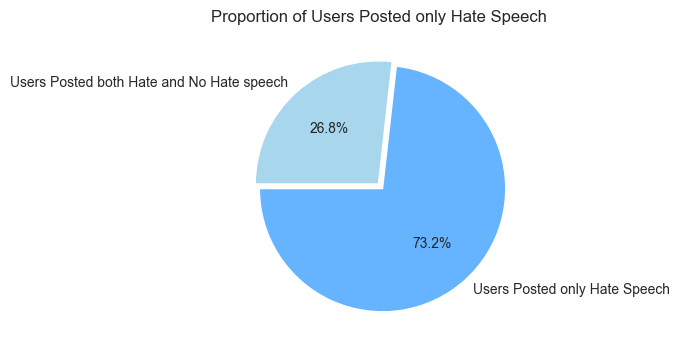

In [22]:
#Pie chart
users_other_speech = total_users - users_only_hate
#-------------------------------------------------------------------------------------------------------------
plt.figure(figsize=(10, 4))
labels = ['Users Posted only Hate Speech', 'Users Posted both Hate and No Hate speech']
sizes = [users_only_hate, users_other_speech]
colors = ['#66b3ff','#a8d7ed']
explode = (0.05,0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=180)
plt.title('Proportion of Users Posted only Hate Speech')
plt.show()

___Observation :___
- _Aprroximately **73.2%** users only posted the Hate Speech._

## ___Building a Predction Model :___

### ___STEP 1 : Natural Language Processing (NLP)___

- Intially Context undergoes various NLP techiques such as ***Tokenization,Text Normalization,Stopword Removal,Stemming or Lemmatization,Part-of-Speech (POS) Tagging,Named Entity Recognition (NER)*** and fillany converted into vectors.Simply the context is normalized to the required format to pursue Machine Learning.

In [ ]:
#Import necessary libraries
import nltk
from nltk.tokenize import sent_tokenize,word_tokenize
from nltk.corpus import stopwords
import string
import re
from nltk.stem import WordNetLemmatizer #Only lemmatization is done not stemming
#--------------------------------------------------------------------------------
#Dowloading required packages
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

In [24]:
#Taking a copy of original dataframe
df_nlp=df.copy()
#Selecting only required columns
df_nlp=df_nlp[["context","label"]]
df_nlp.head()

,context,label
0,"As of March 13th , 2014 , the booklet had been...",noHate
1,Thank you in advance. : ) Download the youtube...,noHate
2,In order to help increase the booklets downloa...,noHate
3,( Simply copy and paste the following text int...,noHate
4,Click below for a FREE download of a colorfull...,hate


In [25]:
#Checking for duplicates
print("Number of duplicated rows :",df_nlp.duplicated().sum())

Number of duplicated rows : 169


In [26]:
#Removing the duplicated rows
df_nlp.drop_duplicates(inplace=True)

In [27]:
#Context
for context in (df_nlp["context"].loc[:5]):
    print("**", context)

** As of March 13th , 2014 , the booklet had been downloaded over 18,300 times and counting .
** Thank you in advance. : ) Download the youtube `` description box '' info text file below @ http://www.mediafire.com/download/dqhn1czprr17o21/Booklet-Description-Box _ Info.txt
** In order to help increase the booklets downloads , it would be great if all Stormfronters who had YouTube accounts , could display the following text in the description boxes of their uploaded YouTube videos .
** ( Simply copy and paste the following text into your YouTube videos description boxes. )
** Click below for a FREE download of a colorfully illustrated 132 page e-book on the Zionist-engineered INTENTIONAL destruction of Western civilization .
** Click on the `` DOWNLOAD ( 7.42 MB ) '' green banner link .


In [28]:
#Executing NLP techniques
#lemmatizer
lemmatizer=WordNetLemmatizer()
#Stopwords 
stop_words=set(stopwords.words('english'))
punctuations= string.punctuation
#---------------------------------------------------------------------------------------------------------------
#Function for processing texts
def text_processing(text,type):
            pattern = r'https?://\S+|www\.\S+'
            text = re.sub(pattern, '', text)
            for word in ["FREE","DOWNLOAD","Click"]:
                 text=text.replace(word,"")
            #Word Tokenization
            words=word_tokenize(text)
            tokens=[]
            for word in words:
                    word=word.lower() #Converting to lower case
                    if word not in stop_words and word not in punctuations and word.isalpha() :  #Removing stopwords,puntuation,numbers
                        #Lemmatization
                        lemmatized_word=lemmatizer.lemmatize(word)     
                        tokens.append(lemmatized_word)
            #For the convinience the tokens which are less than 5 are neglected            
            if len(tokens)<5:
                  return ""
            else :
                  if type=="word2vec":
                    return tokens 
                  else:                                              
                     return " ".join(tokens)
            

#-----------------------------------------------------------------------------------------------------------------
#Creating a column to store processed contexts 
df_nlp["processed_context"]=df_nlp["context"].apply(lambda text :text_processing(text,""))
#For input to word embeddings create another column "processed_context_word2vec"
df_nlp["processed_context_word2vec"]=df_nlp["context"].apply(lambda text :text_processing(text,"word2vec"))

In [29]:
df_nlp.head(3)

,context,label,processed_context,processed_context_word2vec
0,"As of March 13th , 2014 , the booklet had been...",noHate,march booklet downloaded time counting,"[march, booklet, downloaded, time, counting]"
1,Thank you in advance. : ) Download the youtube...,noHate,thank advance download youtube description box...,"[thank, advance, download, youtube, descriptio..."
2,In order to help increase the booklets downloa...,noHate,order help increase booklet downloads would gr...,"[order, help, increase, booklet, downloads, wo..."


In [30]:
#Removing the rows which are not needed
df_nlp=df_nlp[df_nlp["processed_context"]!=""]
print("Shape of the data :",df_nlp.shape)
print("-"*100)
#--------------------------------------------------------------------
#Processed context
print("Processed Context :\n")
for processed_context in df_nlp["processed_context"].loc[:5]:
    print("**",processed_context )

Shape of the data : (7290, 4)
----------------------------------------------------------------------------------------------------
Processed Context :

** march booklet downloaded time counting
** thank advance download youtube description box info text file
** order help increase booklet downloads would great stormfronters youtube account could display following text description box uploaded youtube video
** simply copy paste following text youtube video description box
** download colorfully illustrated page intentional destruction western civilization


___Word Cloud :___

In [31]:
#Import necessary Libraries
from wordcloud import WordCloud

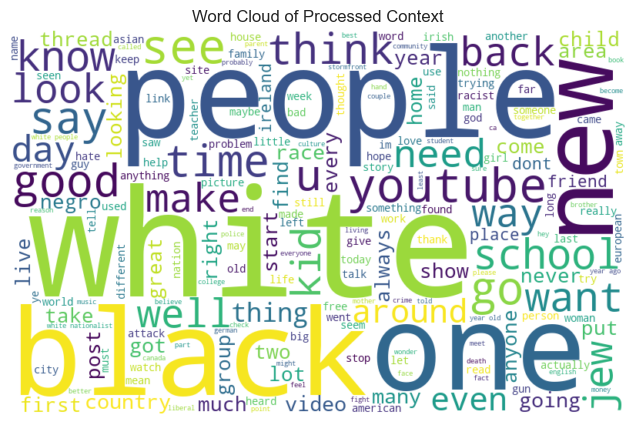

In [32]:
#Word cloud
text=' '.join(df_nlp['processed_context'])
wordcloud=WordCloud(width=800, height=500,background_color='white').generate(text)
#----------------------------------------------------------------------------------
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Processed Context')
plt.show()


### ___STEP 2 : Machine Learning___

- _Before training the model , processed context is converted into numerical  vectors (Text Representation) ._


In [33]:
#Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from gensim.models import Word2Vec
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,f1_score, classification_report

In [34]:
#Feature variable(X)
X1=df_nlp["processed_context"]
#Target variable(y)
y=df_nlp["label"]
#Encoding target labels
y=y.replace({"hate":1,"noHate":0})
y.head()

0    0
1    0
2    0
3    0
4    1
Name: label, dtype: int64

_Here 3 different vectorization techniques such as_

- **Count Vectorizer**
- **Tfidf Vectorizer**
- **Word2Vec**

_are used and trained with different models and checked for accuracy_


___Count Vectorizer :___

In [ ]:
count_vectorizer = CountVectorizer()
X_count = count_vectorizer.fit_transform(X1)
#---------------------------------------------------------------------------------
model_list=[]
train_accuracy_count=[]
test_accuracy_count=[]
f1_score_count=[]
#------------------------------------------------------------------------------------------------
# Define models
models = {
            'Naive Bayes': MultinomialNB(),
            'Random Forest': RandomForestClassifier(random_state=42),
            'Logistic Regression': LogisticRegression(),
            'Decision Tree': DecisionTreeClassifier(),
            "XGBoost": XGBClassifier(objective='binary:logistic'),
            "CatBoost":  CatBoostClassifier(loss_function="Logloss") 
        }
#-------------------------------------------------------------------------------------------------
for model_name, model in models.items():

        # Split Data into Training and Testing Sets for CountVectorizer
        X_train, X_test, y_train, y_test = train_test_split(X_count, y, test_size=0.2, stratify=y, random_state=42)
        #----------------------------------------------------------------------------------------
        # Train the model
        model.fit(X_train, y_train)
        #----------------------------------------------------------------------------------------
        # Predictions
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)
        #----------------------------------------------------------------------------------------
        #Accuracy
        train_accuracy = accuracy_score(y_train, y_train_pred)
        test_accuracy = accuracy_score(y_test, y_test_pred)
        #----------------------------------------------------------------------------------------
        #F1-score
        f1 = f1_score(y_test, y_test_pred, average='macro')
        f1_score_count.append(f1)
        #----------------------------------------------------------------------------------------
        model_list.append(model_name)
        train_accuracy_count.append(train_accuracy)
        test_accuracy_count.append(test_accuracy) 
#------------------------------------------------------------------------------------------------
#Result Data Frame 
df_results_count = pd.DataFrame({'Model':model_list , 'Train Accuracy_CountVec': train_accuracy_count, 'Test Accuracy_CountVec': test_accuracy_count,"F1 Score":f1_score_count})

In [36]:
df_results_count 

,Model,Train Accuracy_CountVec,Test Accuracy_CountVec,F1 Score
0,Naive Bayes,0.930727,0.848422,0.629261
1,Random Forest,1.000000,0.861454,0.554886
2,Logistic Regression,0.958848,0.867627,0.633859
3,Decision Tree,1.000000,0.827846,0.603235
4,XGBoost,0.908608,0.866255,0.627806
5,CatBoost,0.890089,0.872428,0.607293


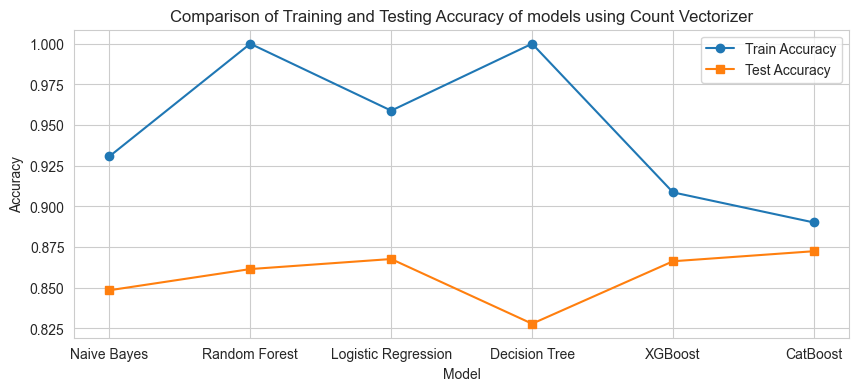

In [37]:
#Line Plot
plt.figure(figsize=(10,4))
plt.plot(model_list, train_accuracy_count, marker='o', label='Train Accuracy')
plt.plot(model_list, test_accuracy_count, marker='s', label='Test Accuracy')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Comparison of Training and Testing Accuracy of models using Count Vectorizer')
plt.legend()
plt.show()

___TF-IDF Vectorizer :___

In [ ]:
tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(X1)
#---------------------------------------------------------------------------------
model_list2=[]
train_accuracy_tfidf=[]
test_accuracy_tfidf=[]
f1_score_tfidf=[]
#------------------------------------------------------------------------------------------------
# Define models
models = {
            'Naive Bayes': MultinomialNB(),
            'Random Forest': RandomForestClassifier(random_state=42),
            'Logistic Regression': LogisticRegression(),
            'Decision Tree': DecisionTreeClassifier(),
            "XGBoost": XGBClassifier(objective='binary:logistic'),
            "CatBoost":  CatBoostClassifier(loss_function="Logloss") 
        }
#-------------------------------------------------------------------------------------------------
for model_name, model in models.items():

        # Split Data into Training and Testing Sets for CountVectorizer
        X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, stratify=y, random_state=42)
        #----------------------------------------------------------------------------------------
        # Train the model
        model.fit(X_train, y_train)
        #----------------------------------------------------------------------------------------
        # Predictions
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)
        #----------------------------------------------------------------------------------------
        #Accuracy
        train_accuracy = accuracy_score(y_train, y_train_pred)
        test_accuracy = accuracy_score(y_test, y_test_pred)
        #----------------------------------------------------------------------------------------
        #F1-score
        f1 = f1_score(y_test, y_test_pred, average='macro')
        f1_score_tfidf.append(f1)
        #----------------------------------------------------------------------------------------
        model_list2.append(model_name)
        train_accuracy_tfidf.append(train_accuracy)
        test_accuracy_tfidf.append(test_accuracy) 
#------------------------------------------------------------------------------------------------
#Result Data Frame 
df_results_tfidf = pd.DataFrame({'Model':model_list2 , 'Train Accuracy_CountVec': train_accuracy_tfidf, 'Test Accuracy_CountVec': test_accuracy_tfidf,"F1 Score":f1_score_tfidf})

In [39]:
df_results_tfidf

,Model,Train Accuracy_CountVec,Test Accuracy_CountVec,F1 Score
0,Naive Bayes,0.854938,0.852538,0.460200
1,Random Forest,1.000000,0.860082,0.533340
2,Logistic Regression,0.867798,0.858025,0.505563
3,Decision Tree,1.000000,0.821674,0.613524
4,XGBoost,0.919239,0.868999,0.639835
5,CatBoost,0.895919,0.867627,0.596706


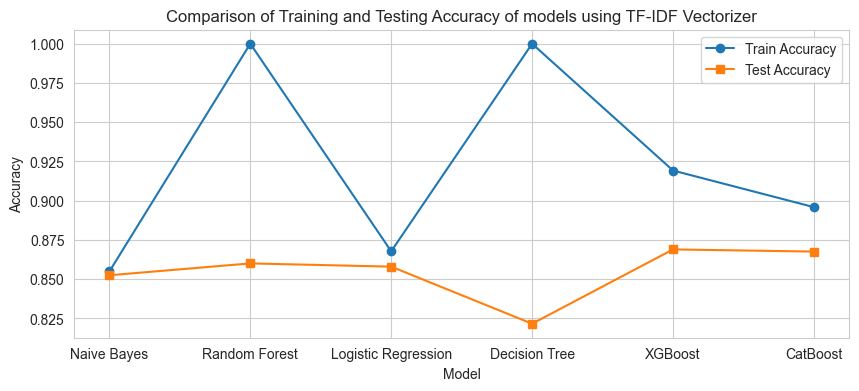

In [40]:
#Line Plot
plt.figure(figsize=(10,4))
plt.plot(model_list2, train_accuracy_tfidf, marker='o', label='Train Accuracy')
plt.plot(model_list2, test_accuracy_tfidf, marker='s', label='Test Accuracy')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Comparison of Training and Testing Accuracy of models using TF-IDF Vectorizer')
plt.legend()
plt.show()

___Word2Vec :___

In [ ]:
#Feature variable(X)
X2=df_nlp["processed_context_word2vec"]
#-----------------------------------------------------------------------------------------------
#Split Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=0.2, random_state=42)
#-----------------------------------------------------------------------------------------------
#Word embedding
word2vec_model = Word2Vec(sentences=X_train, vector_size=100, window=5, min_count=1, workers=4)
#-----------------------------------------------------------------------------------------------
def document_vector(word2vec_model, doc):
    doc = [word for word in doc if word in word2vec_model.wv.key_to_index]
    return np.mean([word2vec_model.wv.word_vec(word) for word in doc], axis=0)

X_train_word2vec = [document_vector(word2vec_model, doc) for doc in X_train]
X_test_word2vec = [document_vector(word2vec_model, doc) for doc in X_test]
#-----------------------------------------------------------------------------------------------
#Using MinMax scaling to normalize the values between 0 to 1 because naive bayes takes only positive inputs not negative inputs
mm_scaler = MinMaxScaler()
X_train_scaled = mm_scaler.fit_transform(X_train_word2vec)
X_test_scaled = mm_scaler.transform(X_test_word2vec )
#-----------------------------------------------------------------------------------------------
model_list3=[]
train_accuracy_wv=[]
test_accuracy_wv=[]
f1_score_wv=[]
#------------------------------------------------------------------------------------------------
# Define models
models = {
            'Naive Bayes': MultinomialNB(),
            'Random Forest': RandomForestClassifier(random_state=42),
            'Logistic Regression': LogisticRegression(),
            'Decision Tree': DecisionTreeClassifier(),
            "XGBoost": XGBClassifier(objective='binary:logistic'),
            "CatBoost":  CatBoostClassifier(loss_function="Logloss") 
        }
#-------------------------------------------------------------------------------------------------
for model_name, model in models.items():
        #----------------------------------------------------------------------------------------
        # Train the model
        model.fit(X_train_scaled, y_train)
        #----------------------------------------------------------------------------------------
        # Predictions
        y_train_pred = model.predict(X_train_scaled)
        y_test_pred = model.predict(X_test_scaled)
        #----------------------------------------------------------------------------------------
        #Accuracy
        train_accuracy = accuracy_score(y_train, y_train_pred)
        test_accuracy = accuracy_score(y_test, y_test_pred)
        #----------------------------------------------------------------------------------------
        #F1-score
        f1 = f1_score(y_test, y_test_pred, average='macro')
        f1_score_wv.append(f1)
        #----------------------------------------------------------------------------------------
        model_list3.append(model_name)
        train_accuracy_wv.append(train_accuracy)
        test_accuracy_wv.append(test_accuracy) 
#------------------------------------------------------------------------------------------------
#Result Data Frame       
df_results_wv = pd.DataFrame({'Model':model_list3 , 'Train Accuracy_CountVec': train_accuracy_wv, 'Test Accuracy_CountVec': test_accuracy_wv,"F1 Score":f1_score_wv})#Result Data Frame


In [42]:
df_results_wv 

,Model,Train Accuracy_CountVec,Test Accuracy_CountVec,F1 Score
0,Naive Bayes,0.853224,0.848422,0.458998
1,Random Forest,1.000000,0.850480,0.459600
2,Logistic Regression,0.853738,0.850480,0.459600
3,Decision Tree,1.000000,0.732510,0.516927
4,XGBoost,0.998628,0.834705,0.470882
5,CatBoost,0.870885,0.850480,0.459600


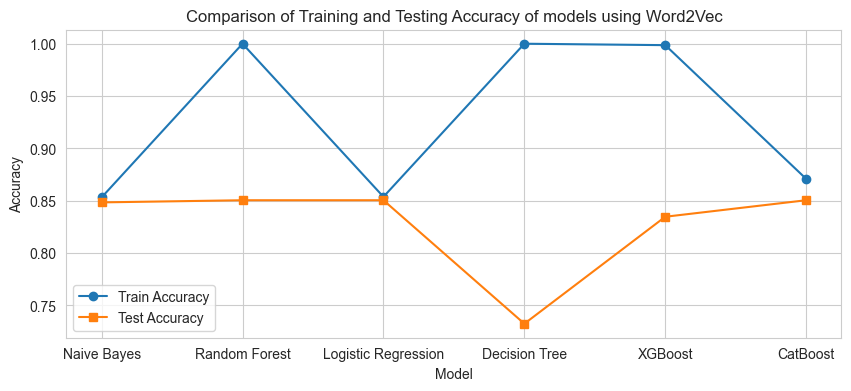

In [43]:
#Line Plot
plt.figure(figsize=(10,4))
plt.plot(model_list3, train_accuracy_wv, marker='o', label='Train Accuracy')
plt.plot(model_list, test_accuracy_wv, marker='s', label='Test Accuracy')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Comparison of Training and Testing Accuracy of models using Word2Vec')
plt.legend()
plt.show()

___Observation :___

- _Comparing accuracies of different models with 3 vectorization techniques The Tree based models like "Random Forest" and "Decision Tree" ,"XGBoost"models have poor performance except "CatBoost".Their training and testing acuracy around **9%-11%** in difference which indicated the models are **"overfitted"**._

- **Logistic Regression and Naive Bayes** performance is poor while using **Count Vectorizer**.

- Eventhough the accuracy is low,**Logistic Regression and Naive Bayes**  models Performed decently in both training and testing in **TF-IDF and Word2Vec**.
------------------------------------------------------------------------------------------------------------------
- ####   ___**F1 Score** all models at different text representation texchniques is **"Very Very Poor"**.The model struggles to identify the minority class (hate speech) even if it performs well on the majority class.Model tends to have **low precsion** indicates that the model makes too many false positive predictions.Low recall indicates that the model misses many positive instances and has a high rate of false negatives.___
- ##### _This Poor F1-Score is due to **"Class Imbalance"** in the dataset.Well balanced classes in the dataset significantly increases the prediction accuracy as well as F1-Score for classification tasks.In addtion to this data quality(with less noise) is also important._

##### ___False Positive/Negative Analysis :___

_Logistic Regression with TF-IDF :_

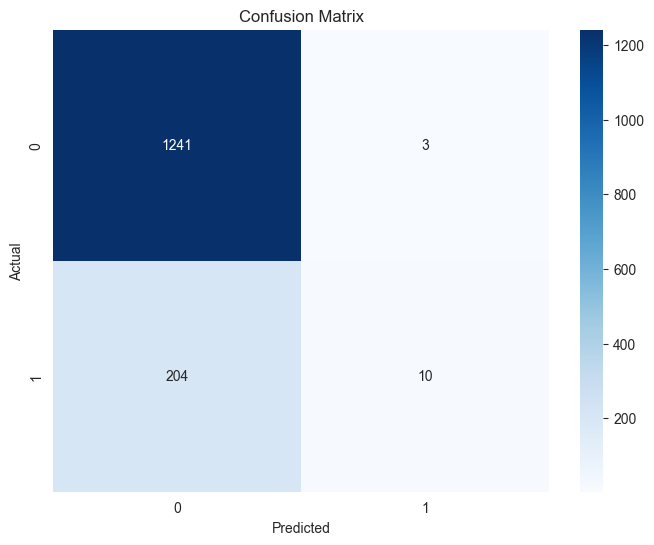

Classification Report
              precision    recall  f1-score   support

           0       0.86      1.00      0.92      1244
           1       0.77      0.05      0.09       214

    accuracy                           0.86      1458
   macro avg       0.81      0.52      0.51      1458
weighted avg       0.85      0.86      0.80      1458



In [44]:
#Naive Bayes with TF-IDF
tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(X1)
#----------------------------------------------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, stratify=y, random_state=42)
#----------------------------------------------------------------------------------------
model=LogisticRegression()
model.fit(X_train, y_train)
#----------------------------------------------------------------------------------------
# Predictions
predictions = model.predict(X_test)
#----------------------------------------------------------------------------------------
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
print("Classification Report")
print(classification_report(y_test, predictions))

#### ___Experiment :___

___Trying to train the model by balanced classes by "Undersampling the Majority Class".___

In [45]:
#Copy of the dataframe
df_nlp_undersampling=df_nlp.copy()
df_nlp_undersampling.head(1)

,context,label,processed_context,processed_context_word2vec
0,"As of March 13th , 2014 , the booklet had been...",noHate,march booklet downloaded time counting,"[march, booklet, downloaded, time, counting]"


In [46]:
hate_count=df_nlp_undersampling[df_nlp_undersampling["label"]=="hate"].shape[0]
#----------------------------------------------------------------------------------------
hate_data=df_nlp_undersampling[df_nlp_undersampling["label"]=="hate"]

In [47]:
#Undersampling by randomly selecting the data
nohate_data=df_nlp_undersampling[df_nlp_undersampling["label"]=="noHate"].sample(n=hate_count,random_state=42).reset_index(drop=True)

In [48]:
#Concatenate  two dataframes
df_sample=pd.concat([hate_data,nohate_data],axis=0,ignore_index=True)
df_sample["label"].value_counts()

label
hate      1071
noHate    1071
Name: count, dtype: int64

In [49]:
#Feature variable(X)
X_sample=df_sample["processed_context"]
#Target variable(y)
y_sample=df_sample["label"]
#Encoding target labels
y_sample=y_sample.replace({"hate":1,"noHate":0})

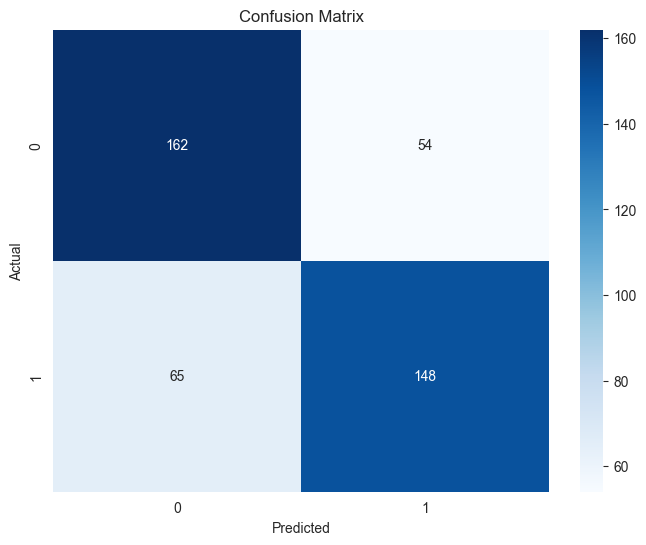

Classification Report :
              precision    recall  f1-score   support

           0       0.71      0.75      0.73       216
           1       0.73      0.69      0.71       213

    accuracy                           0.72       429
   macro avg       0.72      0.72      0.72       429
weighted avg       0.72      0.72      0.72       429



In [50]:
#Naive Bayes with TF-IDF
tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(X_sample)
#----------------------------------------------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y_sample, test_size=0.2, random_state=42)
#----------------------------------------------------------------------------------------
model=LogisticRegression()
model.fit(X_train, y_train)
#----------------------------------------------------------------------------------------
# Predictions
predictions = model.predict(X_test)
#----------------------------------------------------------------------------------------
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
print("Classification Report :")
print(classification_report(y_test, predictions))

##### ___Actual vs Predictions :___

In [74]:
data = {'Actual Class': y_test, 'Predicted Class': predictions}
df_ap=pd.DataFrame(data)
#-----------------------------------------------------------------
df_ap.reset_index(inplace=True,drop=True)
df_ap.replace({1:"hate",0:"noHate"},inplace=True)
df_ap.head(12).T

,0,1,2,3,4,5,6,7,8,9,10,11
Actual Class,hate,noHate,hate,hate,hate,hate,hate,noHate,noHate,noHate,hate,noHate
Predicted Class,hate,noHate,noHate,hate,noHate,hate,hate,noHate,hate,noHate,noHate,noHate


___Observation:___
- _By Training the logistic regression  model with balanced class **F1-score increases upto some level (0.72)** but still it is a low score._

- _On the other hand  **accuracy is decreased (0.72)**. This is may be due to providing insufficient data for training._

___Suggestions :___
- _In future the model is trained with sufficienct and detailed data to achieve good scores._